# Módulo 2 Implementación de un modelo de deep learning. (Portafolio Implementación)

Alejandro Ramos Contreras | A01747461

## Primer intento

In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models
import pandas as pd
import os
from tqdm import tqdm
import numpy as np

# Cargar el archivo CSV
cards_df = pd.read_csv('cards.csv')  # Cambia 'cards.csv' a la ruta correcta si es necesario

# Establecer la ruta base para las imágenes
base_dir = 'dataset'  # Cambia a la ruta donde están las imágenes

# Configuración de tamaño de imagen (224x224)
img_size = (224, 224)

# Función para cargar imágenes y etiquetas de una partición específica (train, val, test)
def load_images_and_labels(df, dataset_type):
    images = []
    labels = []
    subset = df[df['data set'] == dataset_type]
    for _, row in tqdm(subset.iterrows(), total=len(subset)):
        img_path = os.path.join(base_dir, row['filepaths'])
        if os.path.exists(img_path):
            img = tf.keras.utils.load_img(img_path, target_size=img_size)
            img_array = tf.keras.utils.img_to_array(img) / 255.0  # Normalización
            images.append(img_array)
            labels.append(row['class index'])  # Usar directamente 'class index' como etiqueta
    return np.array(images), np.array(labels)

# Cargar imágenes y etiquetas para train, val y test
X_train, y_train = load_images_and_labels(cards_df, 'train')
X_val, y_val = load_images_and_labels(cards_df, 'valid')
X_test, y_test = load_images_and_labels(cards_df, 'test')

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of y_val:", y_val.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

# Construir el modelo CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(cards_df['class index'].unique()), activation='softmax')  # Número de clases únicas
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo con conjunto de validación
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), batch_size=32)

# Evaluar el modelo
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Guardar el modelo
model.save("poker_card_classifier_model.h5")

100%|██████████| 265/265 [00:00<00:00, 2357.23it/s]
/Users/ajelandro/anaconda3/envs/alex/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Shape of X_train: (7624, 224, 224, 3)
Shape of y_train: (7624,)
Shape of X_val: (265, 224, 224, 3)
Shape of y_val: (265,)
Shape of X_test: (265, 224, 224, 3)
Shape of y_test: (265,)
Epoch 1/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 86s 357ms/step - accuracy: 0.1405 - loss: 3.5197 - val_accuracy: 0.5132 - val_loss: 1.7588
Epoch 2/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 85s 356ms/step - accuracy: 0.5774 - loss: 1.6048 - val_accuracy: 0.7057 - val_loss: 1.0879
Epoch 3/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 85s 355ms/step - accuracy: 0.8068 - loss: 0.7031 - val_accuracy: 0.7472 - val_loss: 1.1592
Epoch 4/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 86s 358ms/step - accuracy: 0.9377 - loss: 0.2506 - val_accuracy: 0.7472 - val_loss: 1.2018
Epoch 5/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 85s 357ms/step - accuracy: 0.9699 - loss: 0.1197 - val_accuracy: 0.8038 - val_loss: 1.3761
Epoch 6/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 85s 357ms/step - accuracy: 0.9871 - loss: 0.0654 - val_accuracy: 0.7849 - val_loss: 1.5542
Epoch 7/10
239/239 ━━━━━━━━━━━━━

Test Accuracy: 77.74%


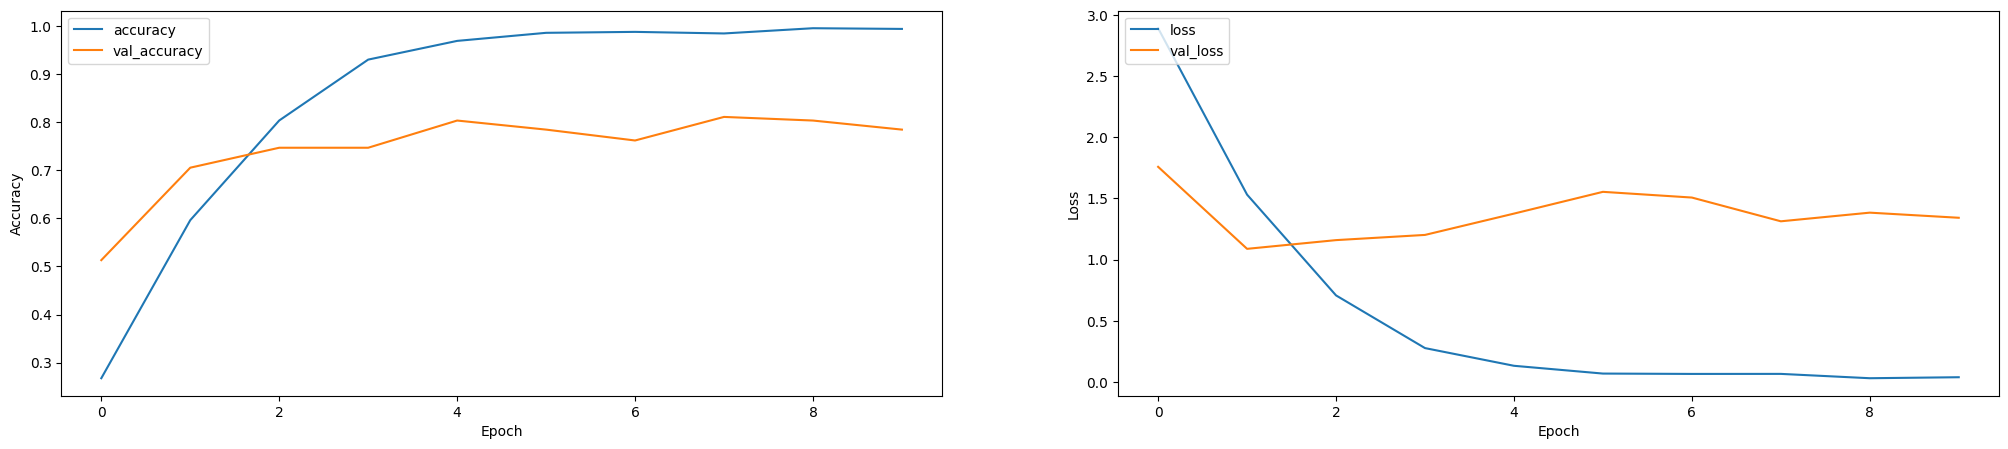

In [8]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2,figsize=(25, 5))
axs[0].plot(history.history['accuracy'], label='accuracy')
axs[0].plot(history.history['val_accuracy'], label = 'val_accuracy')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
#axs[0].set_ylim([0.89,0.92])
axs[0].legend(loc='upper left')

axs[1].plot(history.history['loss'], label='loss')
axs[1].plot(history.history['val_loss'], label = 'val_loss')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].legend(loc='upper left')
plt.show()

## Ajustes

In [18]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Aumentación de datos para entrenar el modelo con variabilidad
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Generar el conjunto de datos de entrenamiento con aumentación
train_generator = train_datagen.flow(X_train, y_train, batch_size=32)

# Construir el modelo CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(len(cards_df['class index'].unique()), activation='softmax')  # Número de clases únicas
])

# Compilar el modelo con un learning rate ajustado
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo usando el generador de datos con aumentación
history = model.fit(train_generator, epochs=100, validation_data=(X_val, y_val))

# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Guardar el modelo
model.save("poker_card_classifier_model_v2.h5")

Epoch 1/100
239/239 ━━━━━━━━━━━━━━━━━━━━ 112s 461ms/step - accuracy: 0.0324 - loss: 3.9220 - val_accuracy: 0.0981 - val_loss: 3.2680
Epoch 2/100
239/239 ━━━━━━━━━━━━━━━━━━━━ 117s 487ms/step - accuracy: 0.0837 - loss: 3.4726 - val_accuracy: 0.1660 - val_loss: 2.9442
Epoch 3/100
239/239 ━━━━━━━━━━━━━━━━━━━━ 123s 510ms/step - accuracy: 0.1157 - loss: 3.2548 - val_accuracy: 0.2000 - val_loss: 2.7220
Epoch 4/100
239/239 ━━━━━━━━━━━━━━━━━━━━ 128s 535ms/step - accuracy: 0.1359 - loss: 3.1250 - val_accuracy: 0.2340 - val_loss: 2.5514
Epoch 5/100
239/239 ━━━━━━━━━━━━━━━━━━━━ 136s 565ms/step - accuracy: 0.1542 - loss: 2.9985 - val_accuracy: 0.2604 - val_loss: 2.4848
Epoch 6/100
239/239 ━━━━━━━━━━━━━━━━━━━━ 146s 608ms/step - accuracy: 0.1741 - loss: 2.9058 - val_accuracy: 0.3094 - val_loss: 2.4087
Epoch 7/100
239/239 ━━━━━━━━━━━━━━━━━━━━ 150s 624ms/step - accuracy: 0.1726 - loss: 2.8760 - val_accuracy: 0.3094 - val_loss: 2.2927
Epoch 8/100
239/239 ━━━━━━━━━━━━━━━━━━━━ 153s 635ms/step - accuracy: 

Test Accuracy: 67.92%


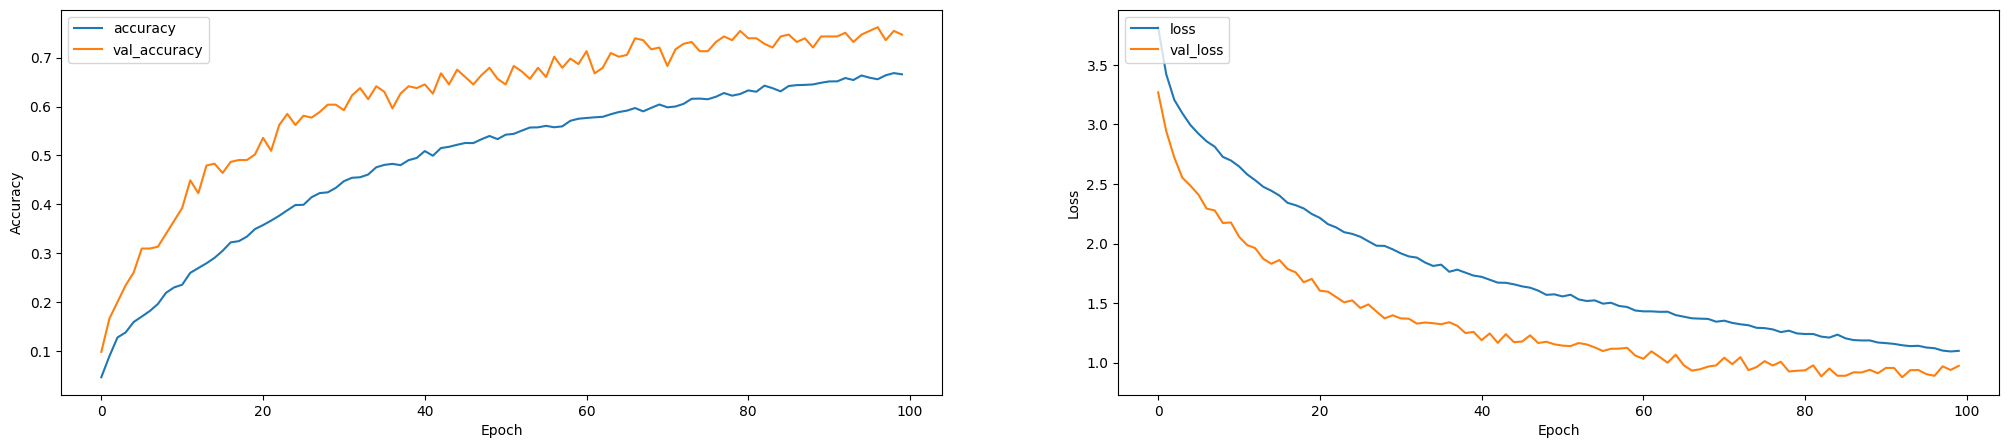

In [19]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2,figsize=(25, 5))
axs[0].plot(history.history['accuracy'], label='accuracy')
axs[0].plot(history.history['val_accuracy'], label = 'val_accuracy')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
#axs[0].set_ylim([0.89,0.92])
axs[0].legend(loc='upper left')

axs[1].plot(history.history['loss'], label='loss')
axs[1].plot(history.history['val_loss'], label = 'val_loss')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].legend(loc='upper left')
plt.show()

In [43]:
import pandas as pd
import random
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image

def select_random_card():
    # Cargar el archivo CSV proporcionado
    cards_df = pd.read_csv('cards.csv')

    # Extraer las etiquetas únicas de la columna 'labels'
    class_labels = cards_df['labels'].unique().tolist()

    # Seleccionar una imagen aleatoria del conjunto de prueba ('data set' == 'test')
    test_images = cards_df[cards_df['data set'] == 'test']
    random_image = test_images.sample(1).iloc[0]

    # Ruta de la imagen y clase esperada
    image_path = os.path.join('dataset',random_image['filepaths'])
    expected_label = random_image['labels']

    return class_labels, image_path, expected_label

def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))  # Redimensionar
    img_array = image.img_to_array(img) / 255.0  # Convertir a array y normalizar
    img_array = np.expand_dims(img_array, axis=0)  # Agregar una dimensión para el batch
    return img_array

# Realizar la predicción
def predict_image_class(img_path, class_labels, model):
    img_array = preprocess_image(img_path)
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)[0]
    predicted_label = class_labels[predicted_class]
    confidence = np.max(prediction) * 100  # Confianza de la predicción
    return predicted_label, confidence


In [70]:
# Usar la función de predicción
model = tf.keras.models.load_model('poker_card_classifier_model_v2.h5')
for i in range(5):
    class_labels, image_path, expected_label = select_random_card()
    predicted_label, confidence = predict_image_class(image_path, class_labels, model)
    print(f"Predicted class: {predicted_label}, Confidence: {confidence:.2f}%")
    print(f"Expected class: {expected_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Predicted class: three of clubs, Confidence: 99.67%
Expected class: three of clubs
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: five of clubs, Confidence: 99.95%
Expected class: five of clubs
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted class: ten of diamonds, Confidence: 37.13%
Expected class: nine of diamonds
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: eight of hearts, Confidence: 98.45%
Expected class: eight of hearts
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted class: ace of hearts, Confidence: 99.91%
Expected class: ace of hearts


In [71]:
# Usar la función de predicción
model = tf.keras.models.load_model('poker_card_classifier_model.h5')
for i in range(5):
    class_labels, image_path, expected_label = select_random_card()
    predicted_label, confidence = predict_image_class(image_path, class_labels, model)
    print(f"Predicted class: {predicted_label}, Confidence: {confidence:.2f}%")
    print(f"Expected class: {expected_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Predicted class: seven of clubs, Confidence: 99.51%
Expected class: seven of clubs
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted class: six of hearts, Confidence: 100.00%
Expected class: six of hearts
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: three of hearts, Confidence: 47.81%
Expected class: two of hearts
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: jack of spades, Confidence: 97.20%
Expected class: jack of spades
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: ten of clubs, Confidence: 89.80%
Expected class: nine of clubs


## ¿Cuales fueron los cambios?

1. Data Augmentation

	•	Primer Intento: No se aplicó data augmentation, lo que significa que el modelo solo vio cada imagen del conjunto de entrenamiento una vez por época.
	•	Segundo Intento: Se agregó ImageDataGenerator para aplicar data augmentation. Esto incluye rotaciones, desplazamientos, zoom y volteos horizontales. Cada vez que el modelo entrenó en una imagen, vio una variación ligeramente diferente, lo cual aumentó la diversidad de datos de entrada.

Por qué funcionó: Esta técnica ayuda a reducir el sobreajuste al evitar que el modelo se “memorice” el conjunto de entrenamiento. Esto permite que el modelo aprenda características más generalizadas, en lugar de depender de patrones específicos en las imágenes originales.

2. Aumento de la Profundidad de la Red

	•	Primer Intento: La arquitectura tenía solo tres capas convolucionales (32, 64 y 128 filtros) y una capa densa.
	•	Segundo Intento: Se agregó una cuarta capa convolucional con 256 filtros, aumentando la capacidad del modelo para aprender características más complejas.

Por qué funcionó: Aumentar la profundidad de la red permite capturar patrones visuales más abstractos y complejos en las capas más profundas. Esto es particularmente útil en tareas de clasificación de este estilo, manejamos 53 distintas clases, cada carta tiene detalles únicos que pueden diferenciarla de otras cartas.

3. Dropout y Regularización

	•	Primer Intento: No se aplicó Dropout ni regularización explícita.
	•	Segundo Intento: Se agregó una capa de Dropout (0.3) en la capa densa final. Esto fuerza al modelo a aprender diferentes combinaciones de características al “apagar” aleatoriamente algunas unidades en cada época, lo que ayuda a evitar la dependencia excesiva en ciertos patrones de los datos de entrenamiento.

Por qué funcionó: El Dropout actúa como regularización, lo cual evita que el modelo dependa de patrones específicos del conjunto de entrenamiento. Esto mejora la capacidad del modelo para generalizar en datos nuevos.

4. Learning Rate Reducido

	•	Primer Intento: Se usó el optimizador Adam con el valor predeterminado de learning rate (0.001).
	•	Segundo Intento: Se redujo el learning rate a 0.0001.

Por qué funcionó: Un learning rate más bajo permite un ajuste más fino de los pesos en las últimas etapas del entrenamiento, reduciendo la probabilidad de que el modelo “salte” alrededor de un mínimo óptimo en lugar de converger hacia él.


- Utilizamos Data Augmentation + Dropout para contrarrestar el overfitting y desempeño tan irregular del primer modelo.
- Profundizamos en la arquitectura y aumentamos bastante las épocas para darle al modelo más tiempo de aprendizaje ya que utilizamos una arquitectura más profunda y así mismo se usan más imágenes por el DA

Resultado final:
-  Logramos eliminar el sobreajuste en la v2 del modelo.
- El modelo cuenta con una ligera mejora en el desempeño con imágenes que nunca ha visto, aunque el porcentaje de precisión no lo diga, el mero hecho de eliminar el overfitting hace que el modelo sea mejor para generalizar y captar detalles fuera del conjunto de training.